In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading the Zomato_cincinnati_restaurants.csv using pandas

In [2]:
df = pd.read_csv('zomato_restaurants_Cincinnati.csv')

In [3]:
df.head()

,Unnamed: 0,rest_id,rest_name,locality,cuisines,cost_for_two,ratings,votes
0,0,17114993,Terry's Turf Club,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",$$,4.7,1038
1,1,17113965,Nada,Downtown,"['Breakfast', 'Mexican']",$$$,4.6,933
2,2,17115298,Zip's Cafe,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",$,4.7,694
3,3,17112031,Arthur's,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",$$,4.7,632
4,4,17116251,Senate,Over-the-Rhine/Mount Auburn,['Bar Food'],$$,4.6,596


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
df = df.set_index('rest_id')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 7 columns):
rest_id         1929 non-null int64
rest_name       1929 non-null object
locality        1929 non-null object
cuisines        1929 non-null object
cost_for_two    1929 non-null object
ratings         1929 non-null float64
votes           1929 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 105.6+ KB


In [10]:
df.columns

Index(['rest_id', 'rest_name', 'locality', 'cuisines', 'cost_for_two',
       'ratings', 'votes'],
      dtype='object')

We have total of 1929 rows and 6 columns. There are no missing values in the data. The columns names can be used as is. Let's have a look at the descriptive statistics.

In [11]:
df.describe()

,rest_id,ratings,votes
count,1.929000e+03,1929.000000,1929.000000
mean,1.715994e+07,3.565630,41.546916
std,1.886667e+05,0.439405,74.902606
min,1.695934e+07,2.000000,0.000000
25%,1.711369e+07,3.300000,6.000000
50%,1.711579e+07,3.600000,17.000000
75%,1.711706e+07,3.900000,45.000000
max,1.870511e+07,4.900000,1038.000000


In [15]:
df[df['votes']==0]

,rest_id,rest_name,locality,cuisines,cost_for_two,ratings,votes
1797,17112057,Station 43 Babes,Cheviot/Westwood,['Bar Food'],$,3.4,0
1826,17111922,Andy's Cafe,Carthage,"['American', 'Burger', 'Bar Food']",$,3.2,0
1827,17115598,Bill's Open Door Cafe,Middletown,"['Breakfast', 'Burger', 'Bar Food']",$,2.9,0
1828,17114573,Scotty's Catering,West Chester,['Sandwich'],$,3.2,0
1829,17112202,Bond Hill Cafe,Bond Hill,"['American', 'Bar Food']",$,3.1,0
1830,17114144,Papa's Pub,Florence,['Italian'],$,3.1,0
1831,17115132,Weber's Cafe,Northside,['American'],$,3.2,0
1832,17115852,Main Street Pizza,Williamsburg,['Pizza'],$,3.3,0
1833,17116503,Friend's Backyard Grill,Clarksville,['American'],$,3.1,0
1835,17113248,Happy Hollow Inn,Norwood,['Pub Food'],$,3.2,0


In [17]:
df[df['votes']==0].shape

(27, 7)

There are 27 restaurants which have 0 voters and a non-zero ratings. As we don't have the info about number of voters we would drop these rows for data sanity.

In [22]:
df.drop(df[df['votes']==0].index , inplace=True)

In [54]:
df['ratings'].unique()

array([4.7, 4.6, 4.5, 4.9, 4.2, 3.9, 4.3, 4.4, 4.1, 4.8, 4. , 3.8, 3.4,
       3.3, 3.5, 3.7, 3.6, 2.2, 3.2, 2.4, 3.1, 3. , 2.5, 2.6, 2.3, 2.1,
       2.7, 2.9, 2.8, 2. ])

In [25]:
df.head()

,rest_name,locality,cuisines,cost_for_two,ratings,votes
rest_id,,,,,,
17114993,Terry's Turf Club,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",$$,4.7,1038
17113965,Nada,Downtown,"['Breakfast', 'Mexican']",$$$,4.6,933
17115298,Zip's Cafe,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",$,4.7,694
17112031,Arthur's,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",$$,4.7,632
17116251,Senate,Over-the-Rhine/Mount Auburn,['Bar Food'],$$,4.6,596


In [56]:
df.shape

(1902, 6)

We will be working with 1902 rows and 6 columns for this dataset.

Let's look at the number of restaurants in each locality

In [42]:
df['locality'].unique()

array(['Hyde Park/Mount Lookout', 'Downtown',
       'Over-the-Rhine/Mount Auburn', 'Clifton/Avondale',
       'East End/Mount Washington', 'Campbell County', 'Montgomery',
       'Northside', 'Springdale', 'Blue Ash', 'Covington',
       'Price Hill/Fairmount', 'Mariemont', 'Norwood', 'West Chester',
       'Deer Park/Madeira', 'Madisonville', 'Cold Spring/Alexandria',
       'Mason', 'Symmes', 'Loveland', 'Fairfax',
       'Walnut Hills/Mount Adams', 'Oakley/Pleasant Ridge',
       'Crescent Springs/Fort Wright', 'Cheviot/Westwood',
       'Anderson Township', 'Milford',
       'Wyoming/Arlington Heights/Reading', 'Florence', 'Sharonville',
       'Independence', 'Colerain Township', 'Fairfield',
       'College Hill/Mt Healthy', 'Monfort Heights/White Oak',
       'Plaineville', 'Lebanon', 'Golf Manor', 'Withamsville', 'Landen',
       'St Bernard/Elmwood Place', 'Erlanger', 'Oxford',
       'Crestview Hills', 'Newtown', 'Cleves', 'Delhi', 'Union Township',
       'Batavia', 'Hamilt

In [43]:
df['locality'].nunique()

91

In [49]:
df.groupby('locality')['rest_name'].count().sort_values(ascending = False)

locality
Downtown                        132
West Chester                     98
Clifton/Avondale                 80
Cheviot/Westwood                 78
Campbell County                  76
Florence                         68
Over-the-Rhine/Mount Auburn      68
Hyde Park/Mount Lookout          65
Covington                        64
Deer Park/Madeira                58
Mason                            57
Hamilton                         48
Fairfield                        39
Middletown                       37
Norwood                          37
Blue Ash                         36
Colerain Township                35
Springdale                       35
Oakley/Pleasant Ridge            33
Milford                          32
College Hill/Mt Healthy          32
Symmes                           31
Walnut Hills/Mount Adams         31
Lawrenceburg                     31
Crescent Springs/Fort Wright     31
Sharonville                      31
Oxford                           30
Anderson Township  

In [52]:
np.sum(df.groupby('locality')['rest_name'].count() >= 10)

45

We observed that there a total of 91 localities with 45 localities having more than 10 restaurants

Let's analyze cost for two data

In [66]:
df['cost_for_two'].unique()

[$$, $$$, $, $$$$]
Categories (4, object): [$$, $$$, $, $$$$]

In [69]:
df['cost_for_two'] = df['cost_for_two'].astype(str)

Let's change the categories to words for our convinience.

* \\$           - Inexpensive
* \\$\\$        - Moderately_priced
* \\$\\$\\$     - Pricey
* \\$\\$\\$\\$  - Priciest

In [71]:
df['cost_for_two']=df['cost_for_two'].map({'$':'Inexpensive','$$':'Moderately_priced','$$$':'Pricey','$$$$':'Priciest'})

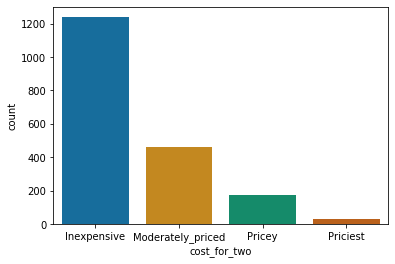

In [73]:
sns.countplot(x='cost_for_two',data=df,palette='colorblind',order=('Inexpensive','Moderately_priced','Pricey','Priciest'))

In [74]:
from wordcloud import WordCloud

In [75]:
df.head()

,rest_name,locality,cuisines,cost_for_two,ratings,votes
rest_id,,,,,,
17114993,Terry's Turf Club,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",Moderately_priced,4.7,1038
17113965,Nada,Downtown,"['Breakfast', 'Mexican']",Pricey,4.6,933
17115298,Zip's Cafe,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",Inexpensive,4.7,694
17112031,Arthur's,Hyde Park/Mount Lookout,"['Burger', 'Bar Food', 'Sandwich']",Moderately_priced,4.7,632
17116251,Senate,Over-the-Rhine/Mount Auburn,['Bar Food'],Moderately_priced,4.6,596


In [88]:
cuisinelist = ' '.join(x for x in df['cuisines'])

In [91]:
cuisinelist = cuisinelist.replace('[','').replace(']','').replace('\'','').replace(',',' ')

In [92]:
cuisinelist

'Burger  Bar Food  Sandwich Breakfast  Mexican Burger  Bar Food  Sandwich Burger  Bar Food  Sandwich Bar Food Indian  Pakistani  Vegetarian BBQ  Southern Burger  Bar Food Mexican  California Italian  Pizza German BBQ  Bar Food Sandwich  Vegetarian Belgian  European  International Sushi  Thai  Vegetarian Southern Steak Desserts  Italian  Pizza French  Italian  Tapas Pizza Seafood  Cajun Breakfast  Italian  Pizza Sandwich  Vietnamese Desserts  Ice Cream Sandwich Burger  Bar Food American  French  Italian Indian  Pakistani Burger  Sandwich Asian  Chinese Burger  Bar Food  Sandwich Seafood  Steak Pizza  Sandwich Burger  Bar Food  Sandwich Breakfast  International Cafe Burger  Bar Food  Sandwich Thai  Vietnamese American  Breakfast  Diner Italian  Pizza  Sandwich Mexican Indian Burger  Italian  Bar Food Mediterranean  Vegetarian  Lebanese Indian Mexican Italian Mexican Seafood  Southern  Cajun  Sushi  Thai  Japanese French American  Diner  Sandwich Italian Breakfast  Sandwich  Chili Interna

In [93]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(cuisinelist) 

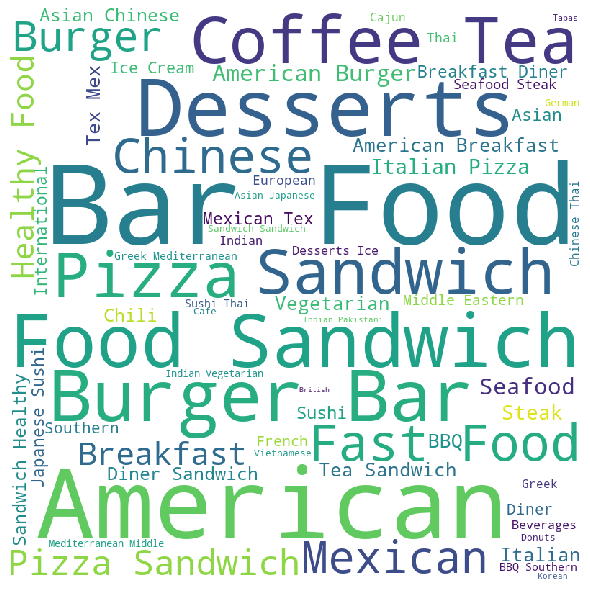

In [94]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

The word cloud gives us a glimpse of most common cuisines served by the restaurants

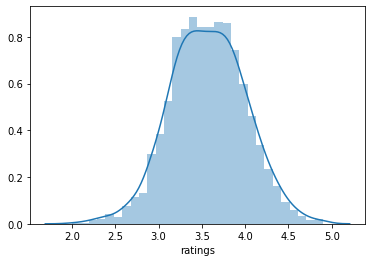

In [96]:
sns.distplot(df['ratings'])

Ratings are normally distributed between 2 and 5

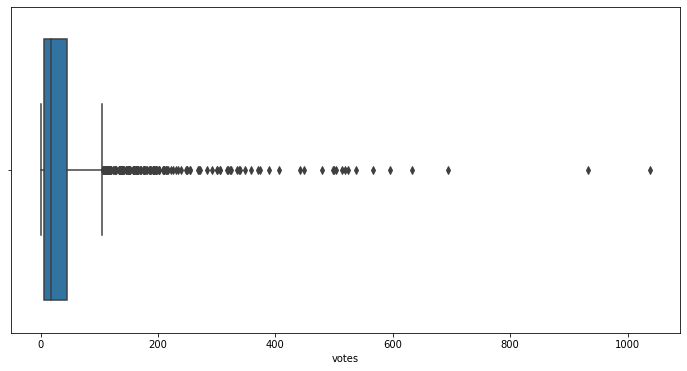

In [108]:
f = plt.figure(figsize=(12,6))
sns.boxplot(df['votes'])

In [112]:
df['votes'].quantile([.1, .25, .5, .75,.8,.9]) 

0.10      3.00
0.25      6.00
0.50     17.00
0.75     45.75
0.80     58.00
0.90    104.00
Name: votes, dtype: float64

As we can see only 10% of the restaurants have 104+ votes and 20% of the restaurants have 58+ votes.

Let's go ahead and build Knowledge based recommendor system and Content based recommendor system.